In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
                

In [2]:
data=pd.read_csv(r"C:\Users\abhin\Downloads\car-mpg.csv")
data

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [3]:
data=data.drop(['car_name'],axis=1)
data['origin']=data['origin'].replace({1:'america',2:'europe',3:'asia'})
data=pd.get_dummies(data,columns=['origin'],dtype=int)
data=data.replace('?', np.nan)


In [4]:
data=data.apply(pd.to_numeric,errors='ignore')

numeric_cols=data.select_dtypes(include=[np.number]).columns     # fill missing values with median only for columns
data[numeric_cols]=data[numeric_cols].apply(lambda x: x.fillna(x.median()))

C:\Users\abhin\AppData\Local\Temp\ipykernel_12636\2829651536.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data=data.apply(pd.to_numeric,errors='ignore')


In [5]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


In [6]:
x=data.drop(['mpg'],axis=1)
y=data[['mpg']]

In [7]:
x_s=preprocessing.scale(x)
x_s=pd.DataFrame(x_s,columns=x.columns)

y_s=preprocessing.scale(y)
y_s=pd.DataFrame(y_s,columns=y.columns)

In [8]:
x_s

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [9]:
y_s

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
393,0.446497
394,2.624265
395,1.087017
396,0.574601


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

for idx,col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name,regression_model.coef_[0][idx]))
    
intercept=regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))

The coefficient for cyl is 1.132132901692922
The coefficient for disp is 0.02187091666480081
The coefficient for hp is -0.036974350396291426
The coefficient for wt is -0.0061612268211776
The coefficient for acc is 0.18528379196930111
The coefficient for yr is 0.7359710519093158
The coefficient for car_type is 5.222818504062047
The coefficient for origin_america is -1.5337484062982119
The coefficient for origin_asia is 1.1429070547072944
The coefficient for origin_europe is 0.3908413515909144
The intercept is -25.804524189791806


In [12]:
ridge_model=Ridge(alpha=0.4)
ridge_model.fit(x_train,y_train)

print('Ridge model coef: {}'.format(ridge_model.coef_))

Ridge model coef: [[ 1.0745122   0.02197319 -0.03635311 -0.00617876  0.18529325  0.73685277
   5.03900692 -1.53771689  1.13791133  0.39980556]]


In [13]:
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

print('Lasso model coef: {}'.format(lasso_model.coef_))

Lasso model coef: [ 0.          0.02297791 -0.02592527 -0.00641316  0.14984857  0.74506564
  2.04547367 -1.83928628  0.0771301  -0.        ]


In [14]:
print(regression_model.score(x_train,y_train))
print(regression_model.score(x_test,y_test))

print('***********************')

print(ridge_model.score(x_train,y_train))
print(ridge_model.score(x_test,y_test))

print('*************************')

print(lasso_model.score(x_train,y_train))
print(lasso_model.score(x_test,y_test))

0.8373422857977738
0.8474768646673947
***********************
0.8373217642150054
0.8473212982285182
*************************
0.8293310961823918
0.8431064583301079


In [15]:
data_train_test=pd.concat([x_train,y_train],axis=1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
64,8,318.0,150.0,4135,13.5,72,0,1,0,0,15.0
55,4,97.0,60.0,1834,19.0,71,1,0,0,1,27.0
317,4,97.0,78.0,2188,15.8,80,1,0,0,1,34.3
102,4,97.0,46.0,1950,21.0,73,1,0,0,1,26.0
358,4,120.0,74.0,2635,18.3,81,1,0,1,0,31.6


In [16]:
import statsmodels.formula.api as smf
ols1=smf.ols(formula='mpg~cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia',data=data_train_test).fit()
ols1.params

Intercept        -19.353393
cyl                1.132133
disp               0.021871
hp                -0.036974
wt                -0.006161
acc                0.185284
yr                 0.735971
car_type           5.222819
origin_america    -7.984879
origin_europe     -6.060290
origin_asia       -5.308224
dtype: float64

In [17]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     176.2
Date:                Wed, 16 Jul 2025   Prob (F-statistic):          7.60e-116
Time:                        11:23:33   Log-Likelihood:                -814.21
No. Observations:                 318   AIC:                             1648.
Df Residuals:                     308   BIC:                             1686.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -19.3534      3.867     -5.

In [19]:
mse=np.mean((regression_model.predict(x_test)-y_test)**2)
import math
rmse=math.sqrt(mse)
print('Root Mean Squared Error {}'.format(rmse))

Root Mean Squared Error 3.1110637722452563


<Axes: xlabel='acc', ylabel='mpg'>

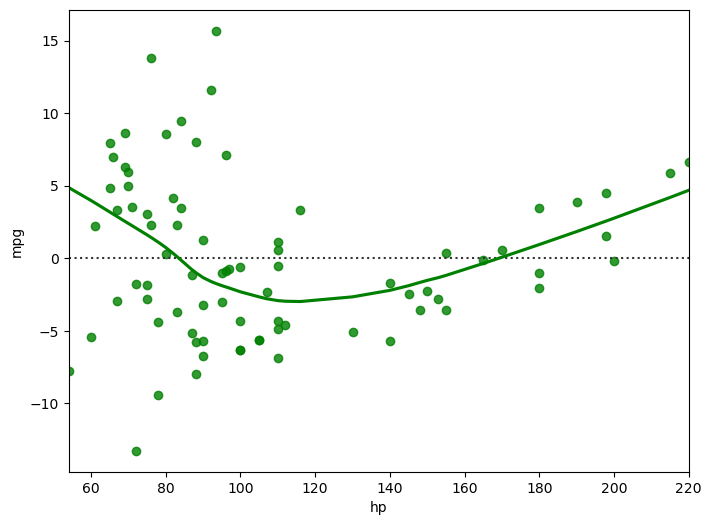

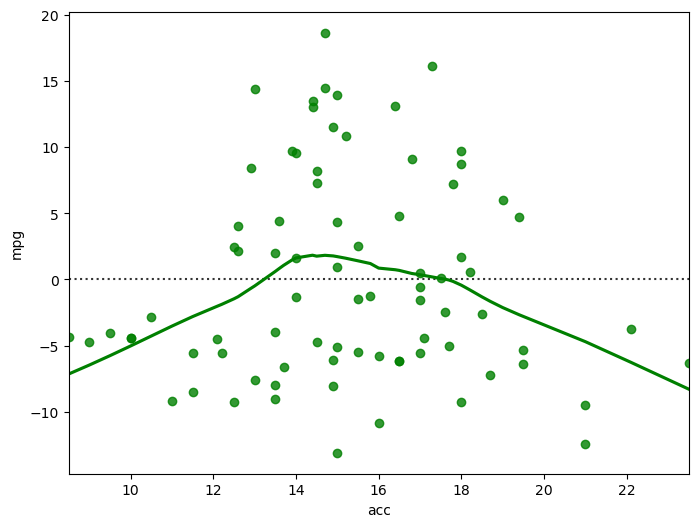

In [22]:
fig=plt.figure(figsize=(8,6))
sns.residplot(x=x_test['hp'],y=y_test['mpg'],color='green',lowess=True)

fig=plt.figure(figsize=(8,6))
sns.residplot(x=x_test['acc'],y=y_test['mpg'],color='green',lowess=True)

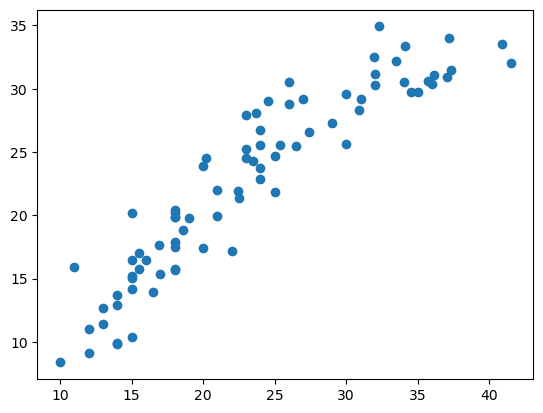

In [23]:
y_pred=regression_model.predict(x_test)
plt.scatter(y_test['mpg'],y_pred)